# <p style="text-align: center;">  <span style="color:#F00"> TP2 Régréssion logistique SD-211 </span>
</p>

# <span style="color:blue"> 1- Régularisation de Tikhonov

## Question 1.1

<span style="color:#F00"> Remarque:  </span> Pour faciliter les calculs de notre fonction, du gradient et de la hésienne  on va inclure dans le vecteur $\omega $ la variable $\omega_{0}$
On pose alors le vecteur $ V  = \left(\begin{array}{c}
\omega\\
\omega_{0}
\end{array}\right) $

Pour $\left(\omega_{0},\omega\right)\in\mathbb{R}\times\mathbb{R}^{p}$
 , on a :

\begin{array}{lll}
f(\omega_{0},\omega) & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\ln\left(1+\exp\left(-y_{i}\left(x_{i}^{T}\omega+\omega_{0}\right)\right)\right)+\dfrac{\rho}{2}\left\Vert \omega\right\Vert _{2}^{2}+\dfrac{\rho}{2}\left\Vert \omega_0\right\Vert_{2}^{2}\\\end{array}

soit V=($\omega,\omega_{0}$) on :$f(\omega_{0},\omega)=f(V)$

$f(V)= {\displaystyle \sum_{i=1}^{n}}\ln(1+\exp(-y_iX_i^TV))+\dfrac{\rho}{2}||V||_2^2$

 

Donc et par suite:

**GRADIENT :**

\begin{array}{lll}
\nabla f(V)
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{-y_{i}\nabla(X_{i}^{T}V) \exp(-y_{i}X_{i}^{T}V) }{1+\exp(-y_{i}X_{i}^{T}V)}+\rho V
\end{array}
\begin{array}{lll}
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{-y_{i}X_{i} \exp(-y_{i}X_{i}^{T}V) }{1+\exp(-y_{i}X_{i}^{T}V)}+\rho V
\end{array}
\begin{array}{lll}
 & = & \dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{-y_{i}X_{i} }{1+\exp(y_{i}X_{i}^{T}V)}+\rho V
\end{array}
où:
$X_i=\left(\begin{array}{c}
1\\x_{i}
\end{array}\right)$

**HESSIENNE :** <br\>

par la même méthode de calcul on obtient:  
\begin{array}{lll}
\nabla^2f(V)=\frac{1}{n}{\displaystyle \sum_{i=1}^{n}}\frac{X_{i}X_{i}^T\exp(y_{i}X_{i}^{T}V) }{(1+\exp(y_{i}X_{i}^{T}V))^2}+\rho I_{p+1}
\end{array}

**CONVEXITÉ :**<br\>

On étudie la matrice hessienne de f, tout calcul fait on trouve que la matrice hessienne est positive ( $\nabla^2f(V) \ge 0$ ).<br\> 
$\forall Z \in \mathbb{R}^{p+1}$ $$ Z^t \nabla^2f(V) Z = \frac{1}{n} \sum_{i=0}^{n} Z^t \frac{X_iX_i^t exp(y_iX_i^tV)}{(1+exp(y_iX_i^tV))^2} Z + \rho Z^t Z$$<br\>
or :
$$Z^TZ = ||Z||_{2}^{2} >0 $$
et
$$Z^TX_{i}X_{i}^TZ=||X_{i}^TZ||_{2}^{2}\ge0$$


## Question 1.2

In [1]:
import numpy as np
from numpy import exp, log
from scipy.special import expit
from scipy.optimize import check_grad
import matplotlib.pyplot as plt


def load_diabetic_retinopathy(filename, minidata=False):
    """
    Cette fonction lit le fichier filename, par exemple
    filename = 'diabeticRetinopathy.csv'
    Elle retourne 
    X : une matrice de caracteristiques
    y : un vecteur des classes tel que si y[i] = 1, la tumeur est maligne
        et si y[i] = -1, la tumeur est benigne

    Pour plus d'infos sur la base de donnees,
    http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set
    """

    data = np.loadtxt(filename, delimiter=',')

    y = data[:, -1] * 2 - 1
    X = data[:, :-1]

    # Standardisation de la matrice
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y

In [2]:
X, y = load_diabetic_retinopathy('diabeticRetinopathy.csv')
n, p = X.shape

In [3]:
def objective(X, y, w, rho):
    """
    Calculer les valeurs, le gradient ainsi que la matrice hessienne de la fonction f
    Entrees : 
    X : Matrices des variables explicatives
    y : Les observations
    w : 
    rho : 
    Sorties 
    val : valeurs de la fonctions f
    grad : le gradient de f
    hes : la matrice hessienne de f
    """
    n, p = X.shape
    val = 0
    grad = np.zeros(p)
    hes = np.zeros((p, p))
    for i in range(n):

        x = X[i, :]
        u = y[i] * ((np.transpose(x)).dot(w))
        val = val - log(expit(u))
        grad = grad - y[i] * expit(-u) * x
        hes = hes + (expit(-u) - expit(-u)**2) * np.outer(x, np.transpose(x))

    val = val / n + rho / 2 * np.linalg.norm(w)
    grad = grad / n + rho * w
    hes = hes / n + rho * np.identity(p)
    return val, grad, hes

In [4]:
w = np.full(p, 10)
rho = 1 / n
w

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10])

In [5]:
val, grad, hes = objective(X, y, w, rho)

In [6]:
val

19.763714801988357

In [7]:
grad

array([ 0.00379991,  0.13474781,  0.20695917,  0.22173135,  0.23484025,
        0.24998702,  0.25653167,  0.25318891,  0.04330371,  0.13840885,
        0.1449312 ,  0.12213453,  0.04486623,  0.03084373,  0.02075784,
        0.02047122,  0.02116412,  0.03335038, -0.04388091])

In [8]:
w = np.random.random(p)


def fun(w): return objective(X, y, w, rho)[0]


def grad(w): return objective(X, y, w, rho)[1]


def hess(w): return objective(X, y, w, rho)[2]


check_grad(fun, grad, w)

0.0016642660273120987

## Question 1.3

In [9]:
def newton(X, y, w, rho, eps, maxiter):
    """
    Impélmenter la méthode de Newton
    Entrees 
    X : Matrices des variables explicatives
    y : Les observations
    w : 
    rho : 
    eps : Paramétre de précision
    maxiter : # D'itérations maximales
    Sorties 
    mini : La valeur du minimiseur 
    vect : Norme du gradient
    """
    mini = w
    val, grad, hes = objective(X, y, w, rho)
    vect = np.array([])
    i = 0
    while(np.linalg.norm(grad) > eps and i < 100):
        try:
            vect = np.append(vect, (np.linalg.norm(grad)))
            mini = mini - np.dot(np.linalg.inv(hes), grad)
            val, grad, hes = objective(X, y, mini, rho)
        except:
            break
        i += 1
    return mini, vect

In [10]:
w = np.zeros(p)
w1, vect = newton(X, y, w, rho, 1e-10, 100)

In [11]:
vect

array([  3.27335632e-01,   8.12663637e-02,   1.92302279e-02,
         4.80739522e-03,   2.24665520e-03,   3.22935275e-04,
         2.57865623e-06,   1.65847447e-10])

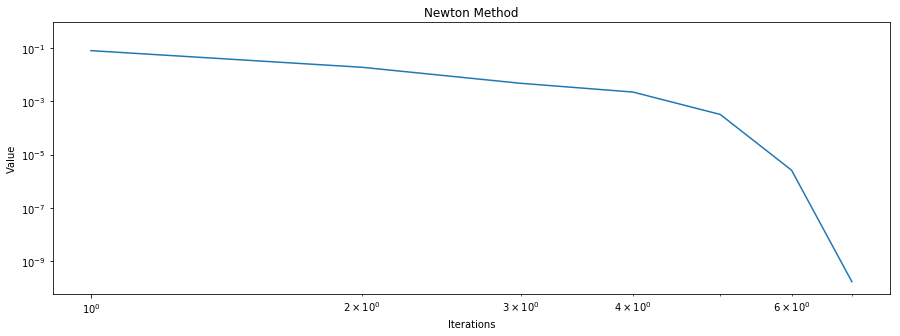

In [12]:
# Plot the dataset
plt.figure(1, figsize=(15, 5))
plt.title('Newton Method')
plt.loglog(vect)
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.show()

## Question 1.4

In [13]:
w = np.ones(p) * 0.3
w2, vect2 = newton(X, y, w, rho, 10**(-10), 100)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


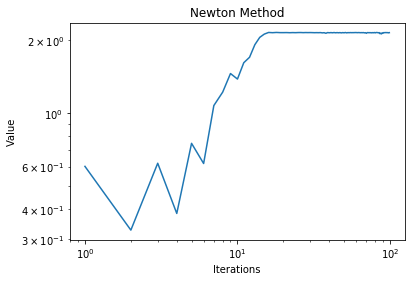

In [14]:
# Plot the dataset
plt.title('Newton Method')
plt.loglog(vect2)
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.show()

## Question 1.5

In [15]:
def newton_linear_search(f, grad, hess, init, epsilon):
    """
    Implémente la méthode de Newton avec l'algorithme de la recherche linéaire d'Armijo
    Entrees 
    f : la fonction sur laquelle on va implémenter cette Méthode
    grad : le gradient de f
    hess : la matrice hessienne de f
    init : la valeur de départ
    epsilon : paramétre de précision
    Sorties 
    val : Le minimiseur 
    w : Valeur du minimiseur
    norm_grad : Norme du gradient
    """
    w = init
    val = fun(w)
    g = grad(w)
    h = hess(w)
    norm_grad = [np.linalg.norm(g)]
    while (np.linalg.norm(g) >= epsilon):
        d = np.dot(np.linalg.inv(h), g)  # initialiser la directon de descente
        gamma = 1.  # le pas gamma = b * a^l
        alpha = .5  # joue le rôle de a
        beta = 1e-4  # joue le rôle de beta
        # trouver le pas optimal en trouvant le plus petit entier vérifiant l'inégalité
        while (f(w - gamma * d) > val - beta * gamma * np.dot(g, np.matrix(d).T)):
            gamma = alpha * gamma  # gamma = ba^(l+1)

        w = w - gamma * d  # mettre à jour le nouveau w
        val = f(w)
        g = grad(w)
        h = hess(w)
        norm_grad = np.concatenate((norm_grad, [np.linalg.norm(g)]))

    return val, w, norm_grad

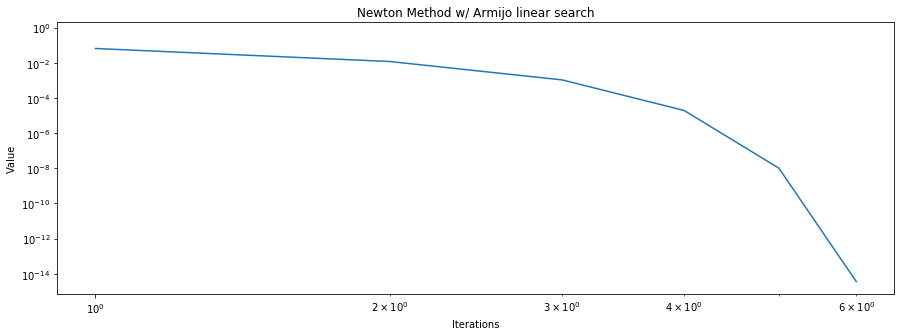

In [16]:
init = (0.3 * np.ones(p))
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.title('Newton Method w/ Armijo linear search')
plt.loglog(newton_linear_search(fun, grad, hess, init, 1e-10)[2])
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.show()

# <span style="color:blue"> 2- Régularisation pour la parcimonie

## Question 2.1

La fonction $g$ définie par:
$$g(V)= {\displaystyle \sum_{i=1}^{n}}\ln(1+\exp(-y_iX_i^TV))+\dfrac{\rho}{2}||V||_1^2$$
n'est pas dérivable sur $\mathbb{R}^{p+1}$ donc elle n'est pas de classe $\mathscr {C}^2$ sur $\mathbb{R}^{p+1}$ et par suite on ne peut pas appliquer la méthode de newton.

## Question 2.2

**Définition des fonctions**

Nous posons
$$f_2:V \mapsto {\displaystyle \sum_{i=1}^{n}}\ln(1+\exp(-y_iX_i^TV))$$
et $g_2$:
$$g_2:V\mapsto \rho||V||_1^2$$

**Opérateur proximal de $g_2$**

**Proximal de $g_2$ :**<br\>
$$
\textrm{prox}_{g_{2}}:V \mapsto\left(\begin{array}{l}
\textrm{prox}_{g_{2,0}}(V)\\
\textrm{prox}_{g_{2,1}}(V)\\
...\\
\textrm{prox}_{g_{2,p}}(V)
\end{array}\right)
$$
où : $$V=\left(\begin{array}{l}
\omega_{0}\\
...\\
\omega_{p}
\end{array}\right)$$
et on a :
$\forall i \in \{0,..,p\}: $
$$
\textrm{prox}_{g_{2i}}:V\mapsto\begin{cases}
\omega_{i}-\rho & \omega_{i}\geq\rho\\
0 & \left|\omega_{i}\right|<\rho\\
\omega_{i}+\rho & \omega_{i}\leq-\rho
\end{cases}
$$



**Gradient de $f_2$**

Pour $V\in\mathbb{R}^{p+1}$
$$\nabla f_{2}(V)=\dfrac{1}{n}{\displaystyle \sum_{i=1}^{n}}\dfrac{-y_{i}X_{i} }{1+\exp(y_{i}X_{i}^{T}V)}$$

**Convexité**

D'après la question 1.1, $f_2$ est convexe. De plus, la norme 1 est également convexe.
Par suite $F_2$ est convexe car somme de deux fonctions convexes.

## Question 2.3

In [17]:
def objective_2(X, y, w, rho):
    """
    Donne la valeur de la fonction f2 définie ci-dessus
    Entrees 
    X : Matrices des variables explicatives
    y : Les observations
    w : 
    rho : 
    Sorties 
    val : valeurs de la fonctions f
    grad : le gradient de f
    hes : la matrice hessienne de f
    """
    n, p = X.shape
    val = 0
    grad = np.zeros(p)
    hes = np.zeros((p, p))
    for i in range(n):

        x = X[i, :]
        u = y[i] * ((np.transpose(x)).dot(w))
        val = val - log(expit(u))
        grad = grad - y[i] * expit(-u) * x
        hes = hes + (expit(-u) - expit(-u)**2) * np.outer(x, np.transpose(x))

    val = val / n
    grad = grad / n
    hes = hes / n
    return val, grad, hes


def grad2(w): return objective_2(X, y, w, rho)[1]


def hessienne2(w): return objective_2(X, y, w, rho)[2]


def g2(w, rho=0.1): return rho * np.linalg.norm(w, ord=1)

In [18]:
def f2(w, y, X, rho):
    val = 0
    n, p = X.shape
    grad = np.zeros(p)
    hes = np.zeros((p, p))

    for i in range(n):
        x = X[i, :]
        a = y[i] * ((np.transpose(x)).dot(w))
        val = val - log(expit(a))
        grad = grad - y[i] * expit(-a) * x

    val = val / n
    grad = grad / n
    return val, grad


def g2(w):
    g2 = rho * np.linalg.norm(w, ord=1)
    return g2


def F2(w):
    return f2(w, y, X, rho)[0] + g2(w)

In [19]:
def prox(w, rho=0.1):
    """
    Calcule le proximal de la valeur absolue
    """
    pr = np.zeros(p)
    pr[w > rho] = w[w > rho] - rho
    pr[w < -rho] = w[w < -rho] + rho
    pr[0] = 0.0
    return pr

In [20]:
def prox_method(f, f2, init, prox, nombreIteration, eps=1e-10):
    """
    Implémentation de l'algorithme du gradient proximal
    Entrees 
    f : la fonction objective
    f2 : la fonction f2 
    init : point de départ
    prox : le proximal de la valeur absolue
    nombreIteration : nombre d'itérations maximale
    eps : Paramétre de précision
    Sorties
    val : Le minimiseur
    w : La valeur du minimiseur
    norm_grad : La norme du gradient
    """
    w = init
    val = f(w)
    g = f2(w, y, X, rho)[1]
    nombre = 0
    norm_grad = [np.linalg.norm(g)]
    while (np.linalg.norm(g) >= eps and nombre < nombreIteration):
        d = g
        gamma = 1.
        alpha = .5
        beta = 1e-4
        while (f(w - gamma * d) > val - beta * gamma * np.dot(g, np.matrix(d).T)):
            gamma = alpha * gamma
        w = prox(w - gamma * np.ravel(d))
        val = f(w)
        g = f2(w, y, X, rho)[1]
        # h=hess(w)
        norm_grad = np.concatenate((norm_grad, [np.linalg.norm(g)]))
        nombre += 1
        # print(np.linalg.norm(g))

    return val, w, norm_grad

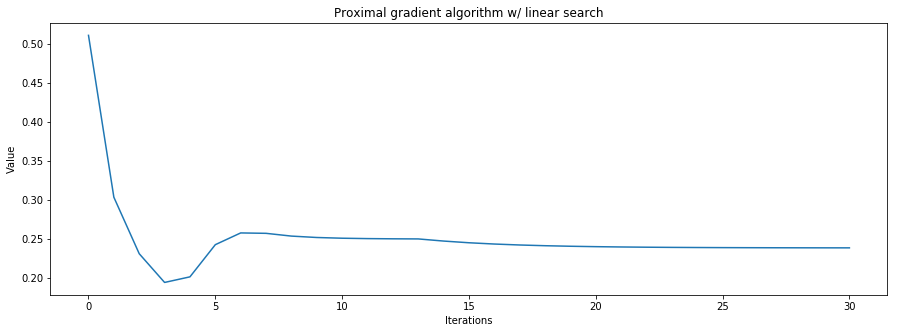

In [21]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.title('Proximal gradient algorithm w/ linear search')
plt.plot(prox_method(F2, f2,
                     0.5 * np.ones(p), prox, 30, 1e-10)[2])
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.show()

# <span style="color:blue"> 3- Comparaison

## Question 3.1 :

Le problème 1 est le problème de (Ridge) où les coefficients ne sont pas mis à zero.<br\>
Le deuxième problème est dit de LASSO qui réduit les coefficients à zéro, il fait la sélection de coefficients.<br\>
Mais si un groupe de prédicteurs sont fortement corrélés entre eux, LASSO a tendance à choisir l'un d'eux et à réduire les autres à zéro. d'après les résultats obtenue la régularisation de Lasso est plus rapide à obtenir.

## Question 3.2 :

In [22]:
from sklearn.metrics import classification_report

In [23]:
y_pred_l2 = np.sign(
    X.dot(newton_linear_search(fun, grad, hess, init, 1e-10)[1]))
y_pred_l1 = np.sign(
    X.dot(prox_method(F2, f2, 0.5 * np.ones(p), prox, 30, 1e-10)[1]))
print("Score: ")
print("----------------------------------------------------")
print("Newton Method : %f" % (np.mean(y == y_pred_l2)))
print("Proximal Method : %f" % (np.mean(y == y_pred_l1)))
print("----------------------------------------------------")
print("Classification report: ")
print("----------------------------------------------------")
print("Newton Method :")
print(classification_report(y, y_pred_l2))
print("----------------------------------------------------")
print("Proximal Method :")
print(classification_report(y, y_pred_l1))

Score: 
----------------------------------------------------
Newton Method : 0.721981
Proximal Method : 0.592528
----------------------------------------------------
Classification report: 
----------------------------------------------------
Newton Method :
             precision    recall  f1-score   support

       -1.0       0.65      0.89      0.75       540
        1.0       0.86      0.57      0.69       611

avg / total       0.76      0.72      0.72      1151

----------------------------------------------------
Proximal Method :
             precision    recall  f1-score   support

       -1.0       0.56      0.63      0.59       540
        1.0       0.63      0.56      0.59       611

avg / total       0.60      0.59      0.59      1151



**Conclusion:** Bien que l'algorithme proximal soit plus rapide que la méthode de newton, il est moins précis que la méthode de Newton.